In [34]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from dataset import ImageDataset
from torch.utils.data import DataLoader

In [35]:
def rand_bbox(size, lam):
    W = size[2]
    H = size[3]
    cut_rat = np.sqrt(1. - lam)
    cut_w = np.int(W * cut_rat)
    cut_h = np.int(H * cut_rat)

    # uniform
    cx = np.random.randint(W)
    cy = np.random.randint(H)

    bbx1 = np.clip(cx - cut_w // 2, 0, W)
    bby1 = np.clip(cy - cut_h // 2, 0, H)
    bbx2 = np.clip(cx + cut_w // 2, 0, W)
    bby2 = np.clip(cy + cut_h // 2, 0, H)

    return bbx1, bby1, bbx2, bby2

In [36]:
train_dataset = ImageDataset(
    fold_file='../AImongo_img/train_folds.csv',
    image_file_path='../AImongo_img/C1-P1_Train',
    folds=[4],
    image_height=224,
    image_width=224,
    mean=(0, 0, 0), #(0.485,0.456,0.406)
    std=(1, 1, 1) #(0.229,0.224,0.225)
)

In [37]:
train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size= 8,
    shuffle=True,
    num_workers=4,
)

### only cutmix images

lam value: 0.8787468112244898


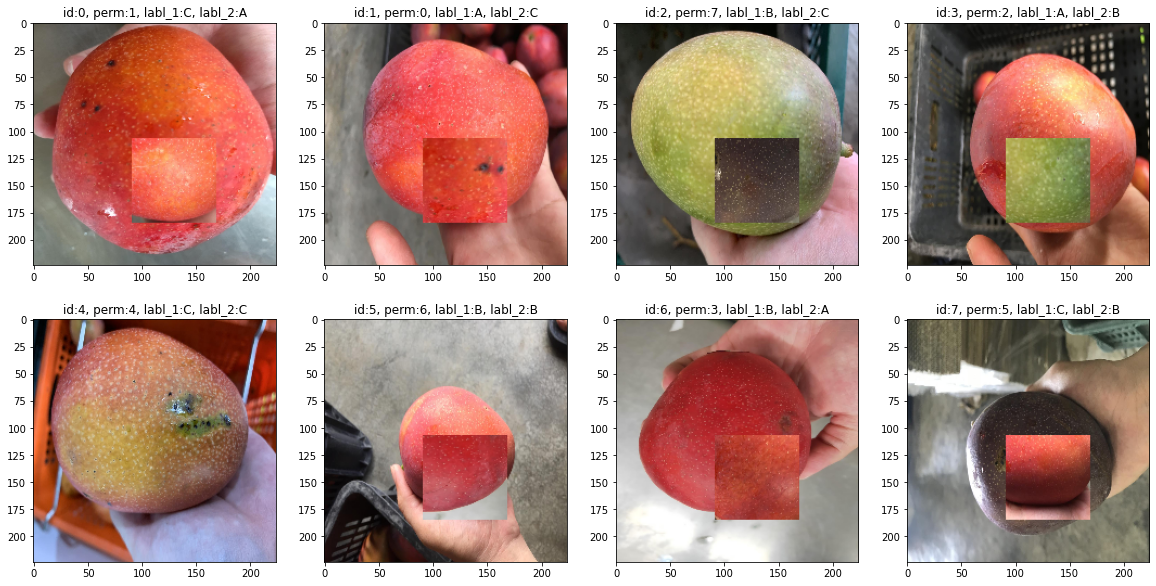

In [51]:
beta = 1
class_map = {0:'A',1:'B',2:'C'}

for batch_id, d in enumerate(train_dataloader):
    image = d['image']
    target = d['label']
    lam = np.random.beta(beta, beta)
    rand_index = torch.randperm(image.size()[0])

    target_a = target
    target_b = target[rand_index]


    bbx1, bby1, bbx2, bby2 = rand_bbox(image.size(), lam)
    image[:, :, bbx1:bbx2, bby1:bby2] = image[rand_index, :, bbx1:bbx2, bby1:bby2]
    # adjust lambda to exactly match pixel ratio
    lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (image.size()[-1] * image.size()[-2]))
    print(f'lam value: {lam}')
    
    fig, ax = plt.subplots(2,4,figsize=(20, 10))
    for i, axi in enumerate(ax.flat):
        axi.imshow(np.transpose(image[i], (1,2,0)))
        axi.set_title('id:{}, perm:{}, labl_1:{}, labl_2:{}'.format(i, rand_index[i],
                                                                    class_map[target_a.numpy()[i]], 
                                                                    class_map[target_b.numpy()[i]]
                                                                   )
                     )
    break

### cutmix and origin images

lam value: 0.5607063137755102


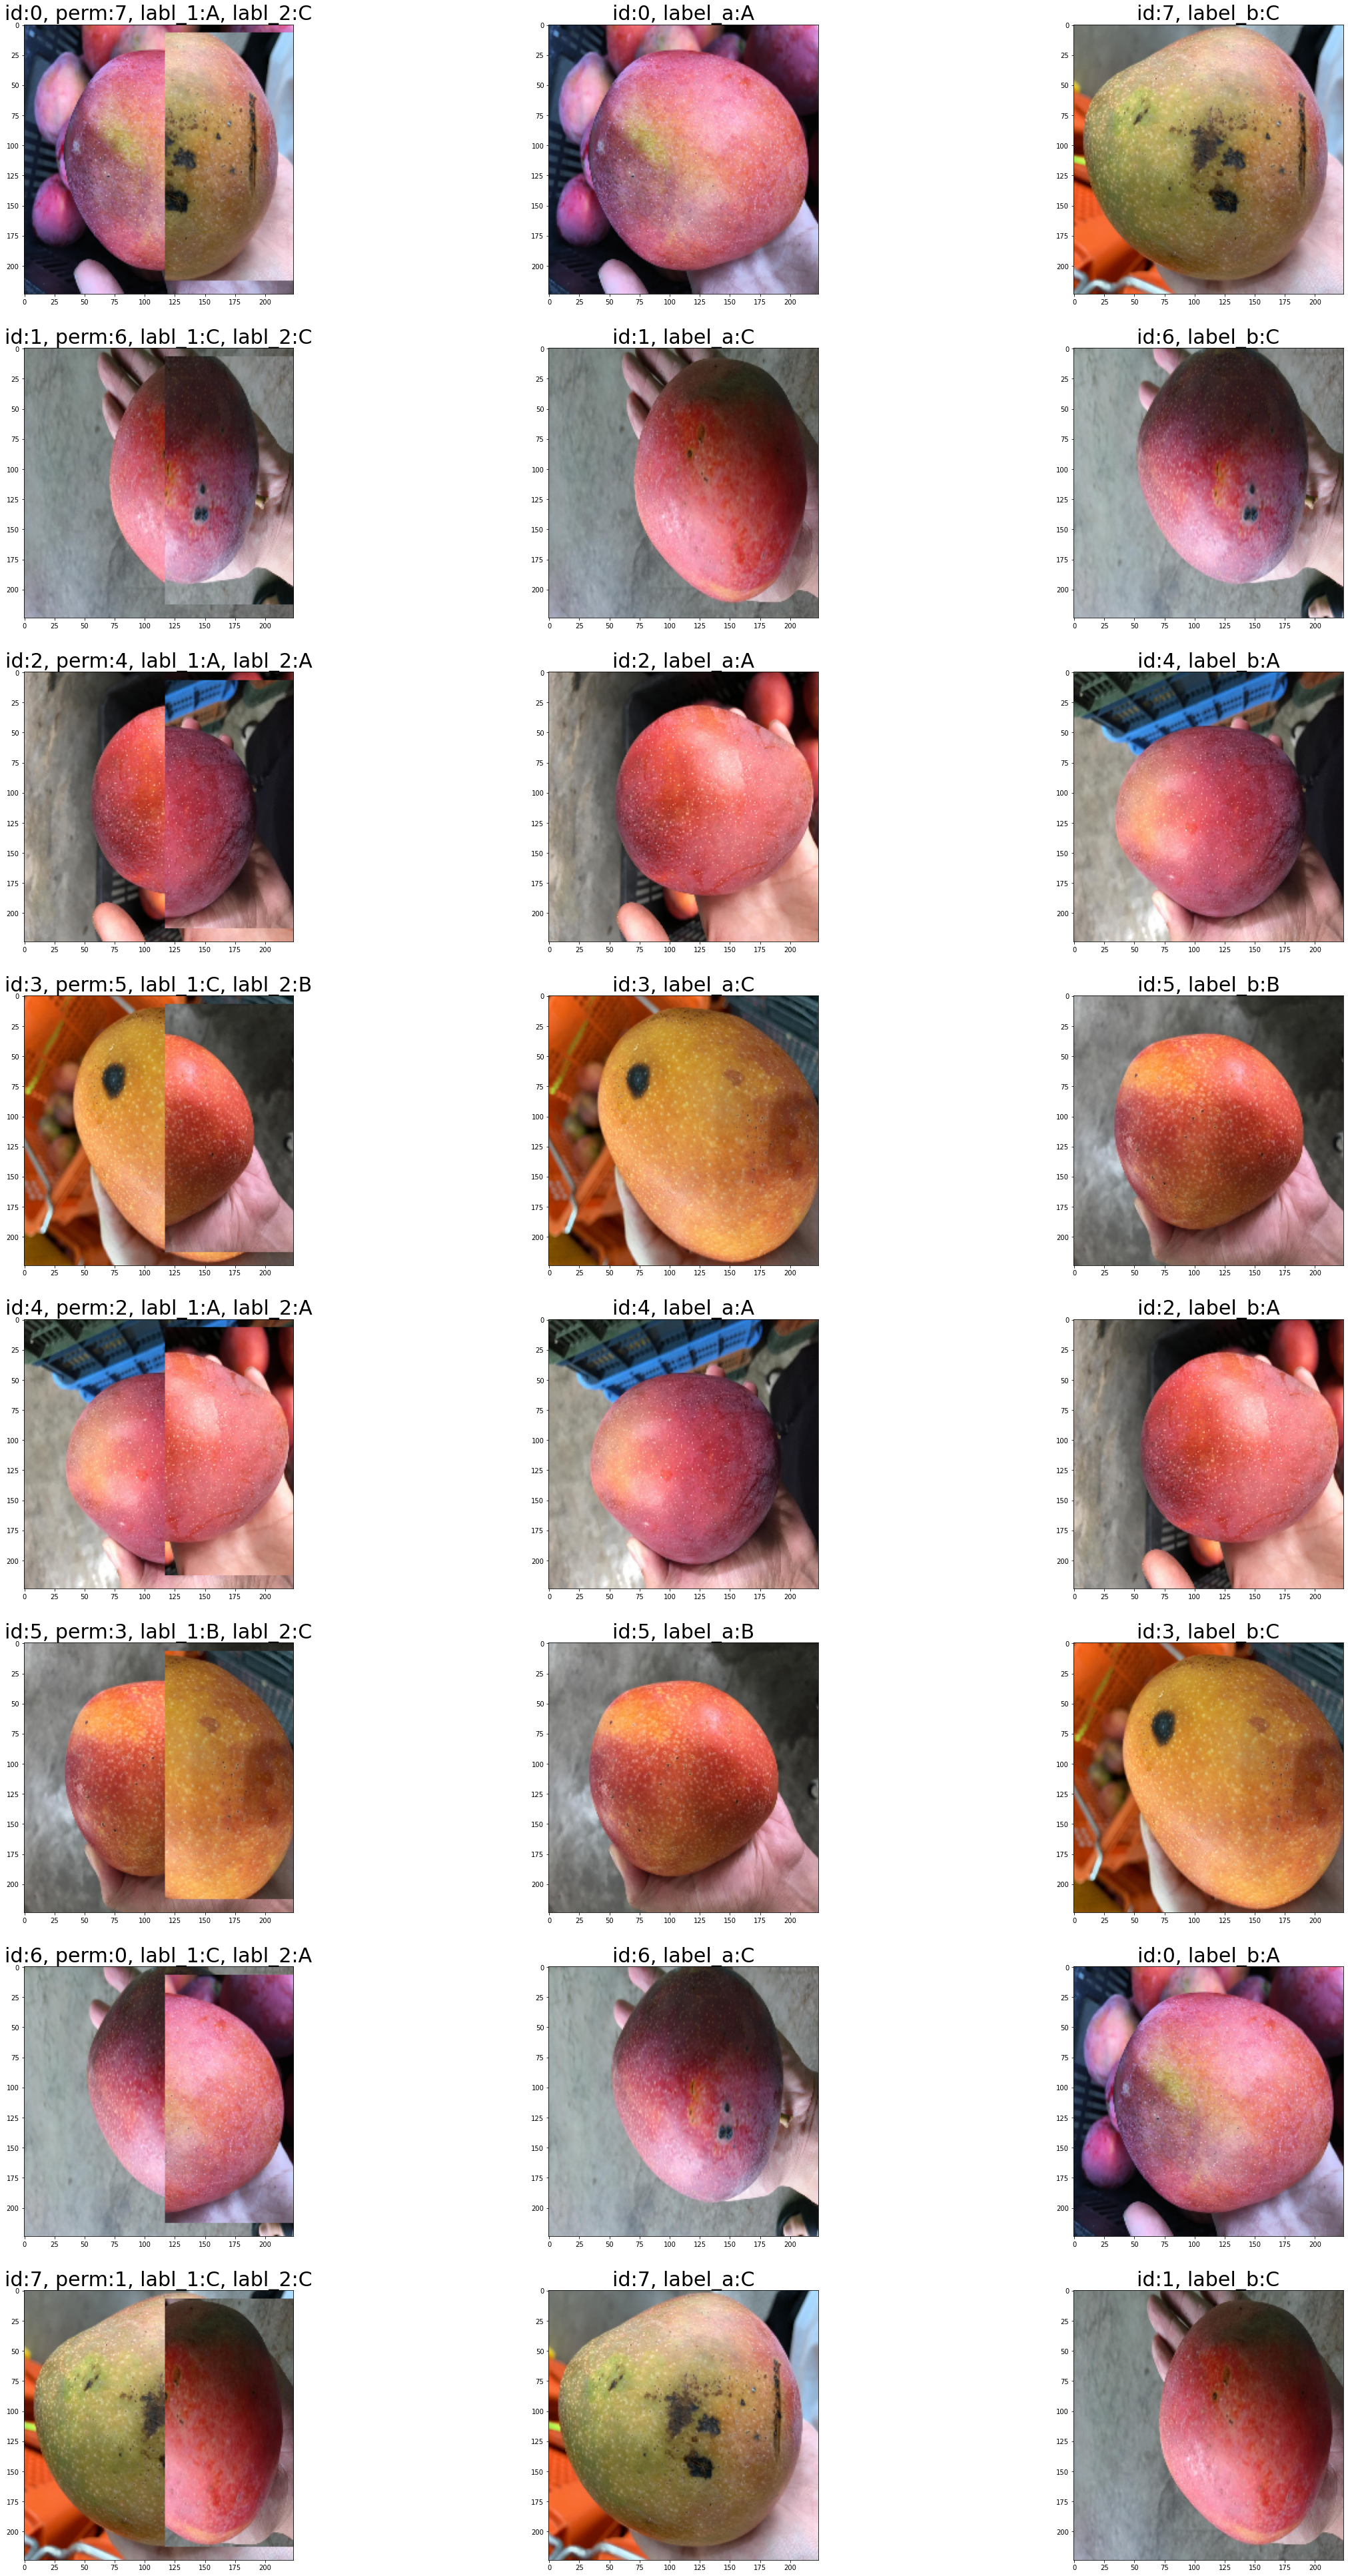

In [77]:
beta = 1
class_map = {0:'A',1:'B',2:'C'}

for batch_id, d in enumerate(train_dataloader):
    image = d['image']
    image_origin = image.clone()
    target = d['label']
    lam = np.random.beta(beta, beta)
    rand_index = torch.randperm(image.size()[0])

    target_a = target
    target_b = target[rand_index]


    bbx1, bby1, bbx2, bby2 = rand_bbox(image.size(), lam)
    image[:, :, bbx1:bbx2, bby1:bby2] = image[rand_index, :, bbx1:bbx2, bby1:bby2]
    # adjust lambda to exactly match pixel ratio
    lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (image.size()[-1] * image.size()[-2]))
    print(f'lam value: {lam}')
    
    fig, ax = plt.subplots(8,3, figsize=(40, 70))
    for i in range(8):
        ax[i,0].imshow(np.transpose(image[i], (1,2,0)))
        ax[i,0].set_title('id:{}, perm:{}, labl_1:{}, labl_2:{}'.format(i, rand_index[i],
                                class_map[target_a.numpy()[i]], class_map[target_b.numpy()[i]]), fontsize=30)
        
        ax[i,1].imshow(np.transpose(image_origin[i], (1,2,0)))
        ax[i,1].set_title('id:{}, label_a:{}'.format(i, class_map[target_a.numpy()[i]]), fontsize=30)
        
        ax[i,2].imshow(np.transpose(image_origin[rand_index[i]], (1,2,0)))
        ax[i,2].set_title('id:{}, label_b:{}'.format(rand_index[i], class_map[target_b.numpy()[i]]), fontsize=30)
    break